In [1]:
model_path = '../output/ablation-mnist-models/relog-elliptical-maxout_4-sigmoid_out-max_fit_l1_1-overlay.pkl'

In [2]:
import sys
sys.path.append('..')

In [3]:
%matplotlib inline
from scipy.special import softmax
import seaborn as sns
from matplotlib import pyplot as plt
import torch
import torchvision
import numpy as np

In [4]:
model = torch.load(model_path, map_location=torch.device('cpu'))

/Users/cumeo/anaconda3/envs/newlogic/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'models.CNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [6]:
test_dataset = torchvision.datasets.MNIST(
            root='../mnist',
            train=False,
            transform=torchvision.transforms.ToTensor(), 
            download=False,
        )
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

In [7]:
x, y = next(iter(test_loader))

In [8]:
def compute_max_probs(x):
    preds, _ = model(x)
    preds_softmax = softmax(preds.detach().numpy(), axis=1)
    max_probs = np.max(preds_softmax, axis=1)
    return max_probs

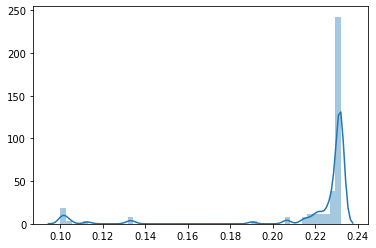

In [9]:
max_probs = compute_max_probs(x)
sns.distplot(max_probs)

In [10]:
max_probs.mean()

0.2177305

In [11]:
max_probs.std()

0.034684688

# How does it fare on training set?

In [12]:
train_dataset = torchvision.datasets.MNIST(
            root='../mnist',
            train=True,
            transform=torchvision.transforms.ToTensor(), 
            download=False,
        )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=False)

In [13]:
train_x, train_y = next(iter(train_loader))

In [14]:
max_probs = compute_max_probs(train_x)

In [15]:
max_probs.mean()

0.22221161

In [16]:
max_probs.std()

0.023945235